# Honey Nut Clusters

Read in the data in cereals.csv and cluster the cereals by the features you choose.

Try different amounts of clusters to see what works best, starting with 3.

Once you have your final clusters, analyze their contents. Give each cluster a name and a description explaining how the cereals in it are similar.

Write up all your analysis, complete with any graphs that may be helpful to understand it.

Note that there are a few pieces of missing data in the cereals data. You may want to fill these in using linear regression or another technique.

In [465]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import scipy

In [466]:
%matplotlib inline

In [467]:
cereals = pd.read_csv('cereals.csv', na_values=-1)

In [468]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,NaN,25,3,1,0.75


In [79]:
cereals['potass'][4] = 90
cereals['potass'][20] = 90
cereals['carbo'][57] = 14.5
cereals['sugars'][57] = 7

/Users/AaronPentz/ironyard/sandbox/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/AaronPentz/ironyard/sandbox/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/AaronPentz/ironyard/sandbox/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pa

In [469]:
cereals.loc[(cereals['potass'].isnull()), "potass"] = cereals.potass.median()
cereals.loc[(cereals['sugars'].isnull()), "sugars"] = cereals.potass.median()
cereals.loc[(cereals['carbo'].isnull()), "carbo"] = cereals.potass.median()

In [90]:
cereal_pop = cereals

In [115]:
cereal_pop.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,90,25,3,1,0.75


In [137]:
cereals.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76],
           dtype='int64')

In [138]:
cereals.head(78)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,90,25,3,1.00,0.75
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67


In [141]:
cereals2 = cereals[cols_to_norm]

In [142]:
cereals2.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70,4,1,130,10,5,6,280,25,1,0.33
1,120,3,5,15,2,8,8,135,0,1,1.00
2,70,4,1,260,9,7,5,320,25,1,0.33
3,50,4,0,140,14,8,0,330,25,1,0.50
4,110,2,2,200,1,14,8,90,25,1,0.75


In [472]:
for col in cols_to_norm:
    for x in cereals.index:
        cereals[col][x] = round(cereals[col][x] * (1/ cereals['cups'][x]), 2)

/Users/AaronPentz/ironyard/sandbox/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [307]:
cols_to_norm = ['calories','protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']
# cereals_norm[cols_to_norm] = cereals_norm[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

In [470]:
names = cereals.name.get_values()

In [471]:
names

array(['100%_Bran', '100%_Natural_Bran', 'All-Bran',
       'All-Bran_with_Extra_Fiber', 'Almond_Delight',
       'Apple_Cinnamon_Cheerios', 'Apple_Jacks', 'Basic_4', 'Bran_Chex',
       'Bran_Flakes', "Cap'n'Crunch", 'Cheerios', 'Cinnamon_Toast_Crunch',
       'Clusters', 'Cocoa_Puffs', 'Corn_Chex', 'Corn_Flakes', 'Corn_Pops',
       'Count_Chocula', "Cracklin'_Oat_Bran", 'Cream_of_Wheat_(Quick)',
       'Crispix', 'Crispy_Wheat_&_Raisins', 'Double_Chex', 'Froot_Loops',
       'Frosted_Flakes', 'Frosted_Mini-Wheats',
       'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats', 'Fruitful_Bran',
       'Fruity_Pebbles', 'Golden_Crisp', 'Golden_Grahams',
       'Grape_Nuts_Flakes', 'Grape-Nuts', 'Great_Grains_Pecan',
       'Honey_Graham_Ohs', 'Honey_Nut_Cheerios', 'Honey-comb',
       'Just_Right_Crunchy__Nuggets', 'Just_Right_Fruit_&_Nut', 'Kix',
       'Life', 'Lucky_Charms', 'Maypo', 'Muesli_Raisins,_Dates,_&_Almonds',
       'Muesli_Raisins,_Peaches,_&_Pecans', 'Mueslix_Crispy_Blend',
       'M

In [309]:
cereals_clean_name = pd.get_dummies(cereals, columns=['mfr', 'type'])
cereals_clean_no_name = pd.get_dummies(cereals)

In [74]:
cereals.potass.median()

90.0

In [78]:
cereals.potass.mean()

98.666666666666671

In [75]:
cereals.carbo.median()

14.5

In [77]:
cereals.sugars.median()

7.0

In [63]:
cereals[cereals['potass'].isnull()] = cereals.potass.mean()

In [310]:
pca = PCA(n_components=2)
pca.fit(cereals_clean_no_name)
reduced_X = pca.transform(cereals_clean_no_name)

In [563]:
kmeans = KMeans(5)
y_pred = kmeans.fit_predict(reduced_X)

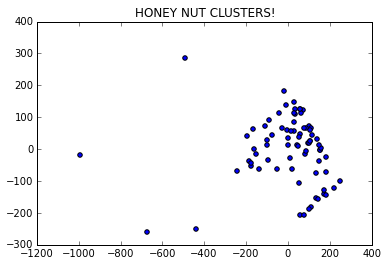

In [564]:
plt.scatter(reduced_X[:, 0], reduced_X[:, 1])
plt.title("HONEY NUT CLUSTERS!")
plt.show()

In [565]:
kmeans.score(reduced_X)

-601279.51054046443

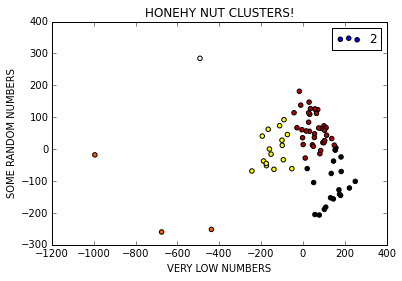

In [566]:
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=y_pred, cmap="hot")
plt.title("HONEHY NUT CLUSTERS!")
plt.xlabel("VERY LOW NUMBERS")
plt.ylabel("SOME RANDOM NUMBERS")
plt.show()

([array([  1.,   0.,   1.,   1.,   1.,   1.,  10.,  17.,  37.,   8.]),
  array([  0.,   0.,   0.,   0.,   0.,   2.,  12.,  31.,  30.,   2.])],
 array([-994.4145402 , -866.48530126, -738.55606231, -610.62682337,
        -482.69758443, -354.76834549, -226.83910654,  -98.9098676 ,
          29.01937134,  156.94861028,  284.87784923]),
 <a list of 2 Lists of Patches objects>)

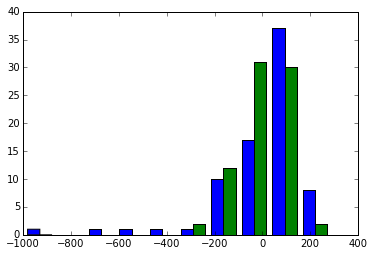

In [567]:
plt.hist(reduced_X)

In [568]:
y_pred

array([2, 0, 2, 2, 1, 1, 0, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 0, 1, 3, 0, 1, 1,
       1, 0, 1, 0, 3, 3, 1, 0, 1, 1, 4, 3, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       3, 1, 1, 3, 1, 3, 3, 1, 0, 0, 3, 0, 3, 3, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 3, 1, 1, 1, 3, 1, 1], dtype=int32)

ValueError: Color array must be two-dimensional

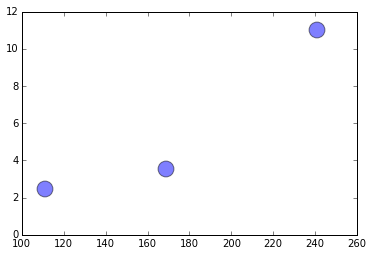

In [300]:
kmeans2 = KMeans(3)
labels = kmeans2.fit_predict(cereals_clean_no_name)

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], alpha=.5, s=250)
plt.scatter(reduced_X[0], reduced_X[1], c=labels, cmap="hot")

In [545]:
new_data = list(zip(names, y_pred))

In [546]:
cereals_group = pd.DataFrame(new_data)

In [479]:
zipped = np.dstack((names, y_pred))

In [ ]:
for colums in cereals.ix[:, 2:10]:
    cereals[col] = cereals[col] * (1/ cereals['cups'])
    

In [327]:
# cereals['multiplier'] = 1 / cereals['cups']

In [547]:
new_y = pd.Series(y_pred)

In [548]:
cereal_groups = pd.DataFrame(names, new_y)

In [549]:
cereal_groups_sorted = cereal_groups.sort()

In [550]:
cereals_group_sorted = cereals_group.sort([1])

In [551]:
cereals_group.head()

,0,1
0,100%_Bran,2
1,100%_Natural_Bran,3
2,All-Bran,2
3,All-Bran_with_Extra_Fiber,2
4,Almond_Delight,0


In [552]:
new_cereals = cereals.join(cereals_group)

In [553]:
new_cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,0,1
0,100%_Bran,N,C,212,12,3,393,30.30,15.15,18.18,848.48,75,3,3.03,1,100%_Bran,2
1,100%_Natural_Bran,Q,C,120,3,5,15,2.00,8.00,8.00,135.00,0,3,1.00,1,100%_Natural_Bran,3
2,All-Bran,K,C,212,12,3,787,27.27,21.21,15.15,969.70,75,3,3.03,1,All-Bran,2
3,All-Bran_with_Extra_Fiber,K,C,100,8,0,280,28.00,16.00,0.00,660.00,50,3,2.00,1,All-Bran_with_Extra_Fiber,2
4,Almond_Delight,R,C,146,2,2,266,1.33,18.67,10.67,120.00,33,3,1.33,1,Almond_Delight,0


In [554]:
new_cereals.drop([0], 1, inplace=True)

In [555]:
new_cereals.rename(columns={1: 'groups'}, inplace=True)

In [556]:
new_cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,groups
0,100%_Bran,N,C,212,12,3,393,30.30,15.15,18.18,848.48,75,3,3.03,1,2
1,100%_Natural_Bran,Q,C,120,3,5,15,2.00,8.00,8.00,135.00,0,3,1.00,1,3
2,All-Bran,K,C,212,12,3,787,27.27,21.21,15.15,969.70,75,3,3.03,1,2
3,All-Bran_with_Extra_Fiber,K,C,100,8,0,280,28.00,16.00,0.00,660.00,50,3,2.00,1,2
4,Almond_Delight,R,C,146,2,2,266,1.33,18.67,10.67,120.00,33,3,1.33,1,0


In [461]:
calories = new_cereals['calories']


In [458]:
calories

143.27272727272728

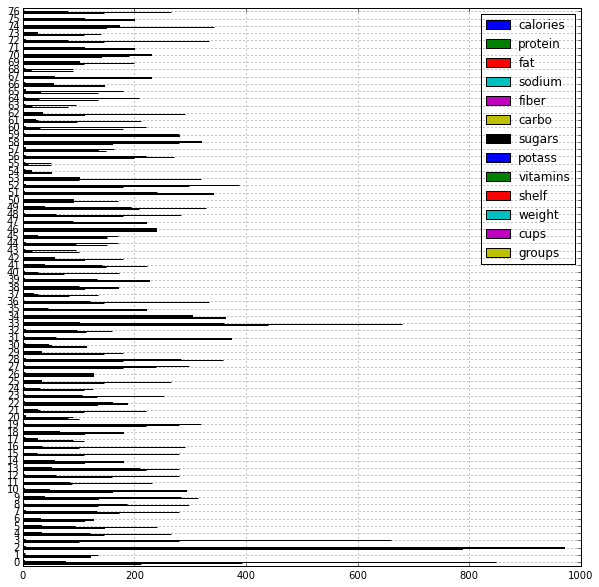

In [557]:
new_cereals.plot(kind='barh', figsize=(10,10))

In [558]:
cereals_group_0 = new_cereals[new_cereals['groups'] == 0]
cereals_group_1 = new_cereals[new_cereals['groups'] == 1]
cereals_group_2 = new_cereals[new_cereals['groups'] == 2]
cereals_group_3 = new_cereals[new_cereals['groups'] == 3]
cereals_group_4 = new_cereals[new_cereals['groups'] == 4]

In [559]:
cereals_group_0.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,groups
4,Almond_Delight,R,C,146,2,2,266,1.33,18.67,10.67,120.00,33,3,1.33,1,0
5,Apple_Cinnamon_Cheerios,G,C,146,2,2,240,2.00,14.00,13.33,93.33,33,1,1.33,1,0
6,Apple_Jacks,K,C,110,2,0,125,1.00,11.00,14.00,30.00,25,2,1.00,1,0
7,Basic_4,G,C,173,4,2,280,2.67,24.00,10.67,133.33,33,3,1.77,1,0
10,Cap'n'Crunch,Q,C,160,1,2,293,0.00,16.00,16.00,46.67,33,2,1.33,1,0


In [560]:
cereals_group_1.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,groups
8,Bran_Chex,R,C,134,2,1,298,5.97,22.39,8.96,186.57,37,1,1.49,1,1
9,Bran_Flakes,P,C,134,4,0,313,7.46,19.40,7.46,283.58,37,3,1.49,1,1
13,Clusters,G,C,220,6,4,280,4.00,26.00,14.00,210.00,50,3,2.00,1,1
19,Cracklin'_Oat_Bran,K,C,220,6,6,280,8.00,20.00,14.00,320.00,50,3,2.00,1,1
27,"Fruit_&_Fibre_Dates,_Walnuts,_and_Oats",P,C,179,4,2,238,7.46,17.91,14.93,298.51,37,3,1.87,1,1


In [561]:
cereals_group_2.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,groups
0,100%_Bran,N,C,212,12,3,393,30.30,15.15,18.18,848.48,75,3,3.03,1,2
2,All-Bran,K,C,212,12,3,787,27.27,21.21,15.15,969.70,75,3,3.03,1,2
3,All-Bran_with_Extra_Fiber,K,C,100,8,0,280,28.00,16.00,0.00,660.00,50,3,2.00,1,2


In [562]:
cereals_group_3.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,groups
1,100%_Natural_Bran,Q,C,120,3,5,15,2.00,8.0,8.00,135.00,0,3,1.00,1,3
17,Corn_Pops,K,C,110,1,0,90,1.00,13.0,12.00,20.00,25,2,1.00,1,3
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.00,21.0,0.00,90.00,0,2,1.00,1,3
26,Frosted_Mini-Wheats,K,C,125,3,0,0,3.75,17.5,8.75,125.00,31,2,1.25,1,3
30,Golden_Crisp,P,C,113,2,0,51,0.00,12.5,17.05,45.45,28,1,1.14,1,3


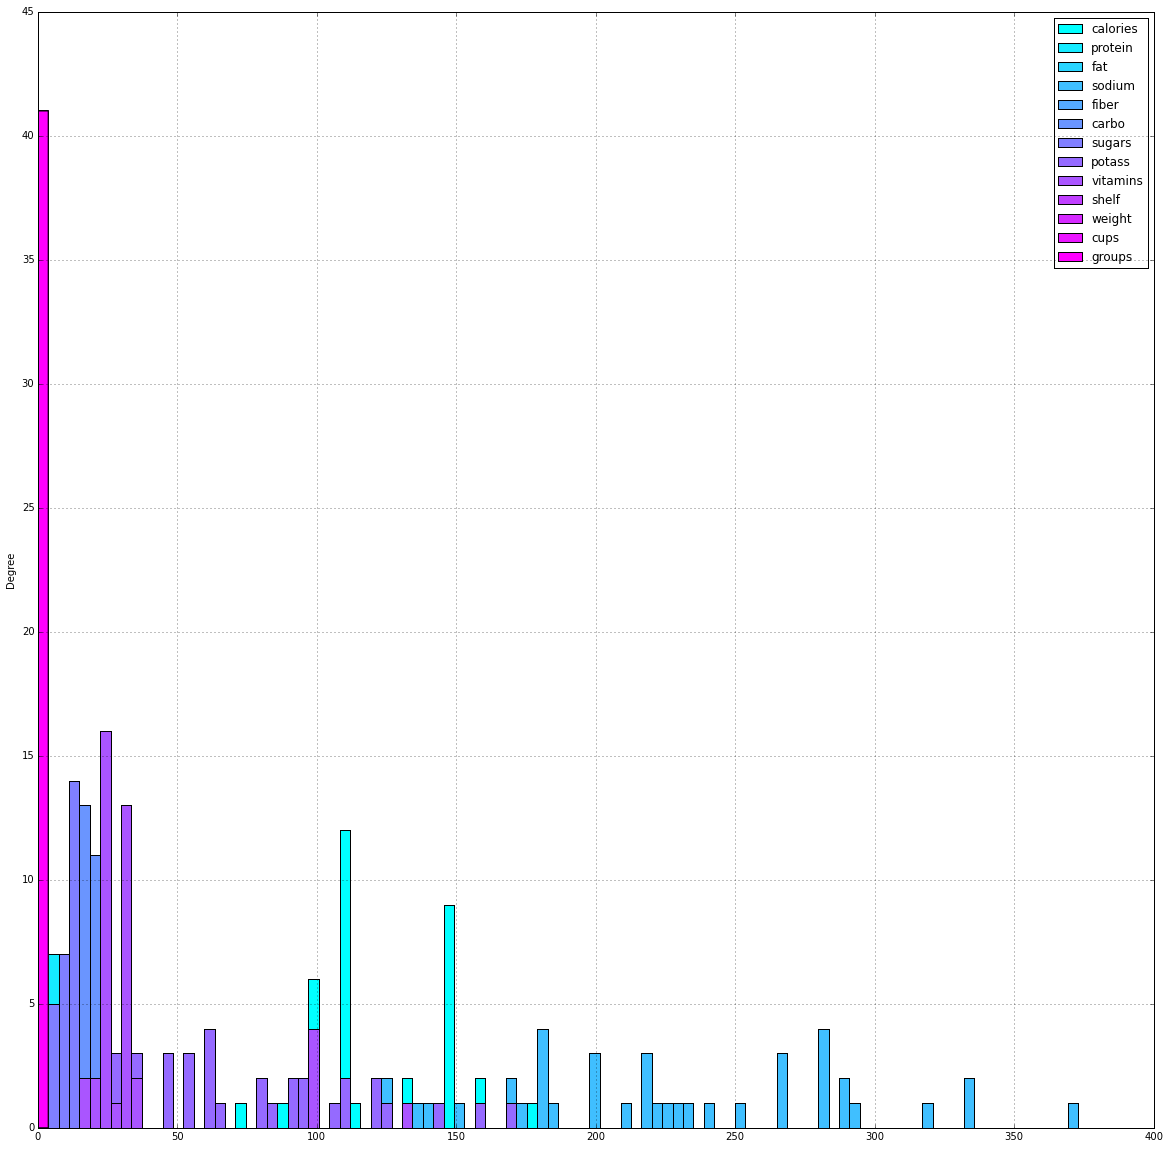

In [569]:
cereals_group_0.plot(kind='hist', bins=100, figsize=(20,20), cmap='cool')

In [529]:
cereals_group_1.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,groups
0,100%_Bran,N,C,212,12,3,393,30.30,15.15,18.18,848.48,75,3,3.03,1,1
2,All-Bran,K,C,212,12,3,787,27.27,21.21,15.15,969.70,75,3,3.03,1,1
3,All-Bran_with_Extra_Fiber,K,C,100,8,0,280,28.00,16.00,0.00,660.00,50,3,2.00,1,1
33,Grape-Nuts,P,C,440,12,0,680,12.00,68.00,12.00,360.00,100,3,4.00,1,1


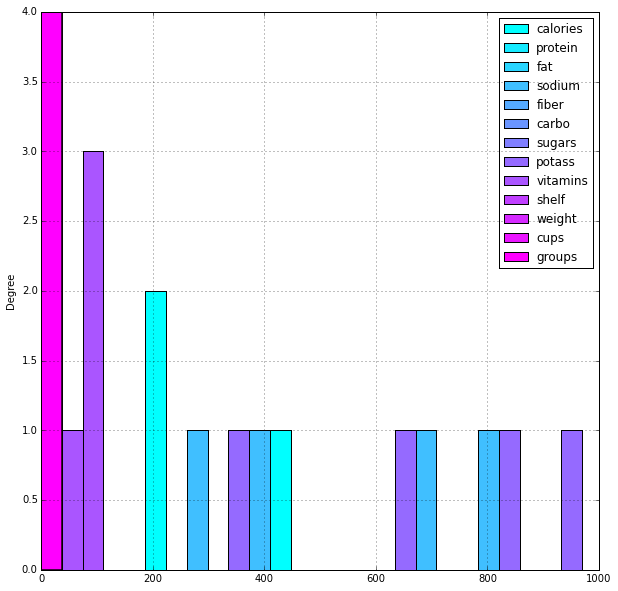

In [530]:
cereals_group_1.plot(kind='hist', bins=26, figsize=(10,10), cmap='cool')

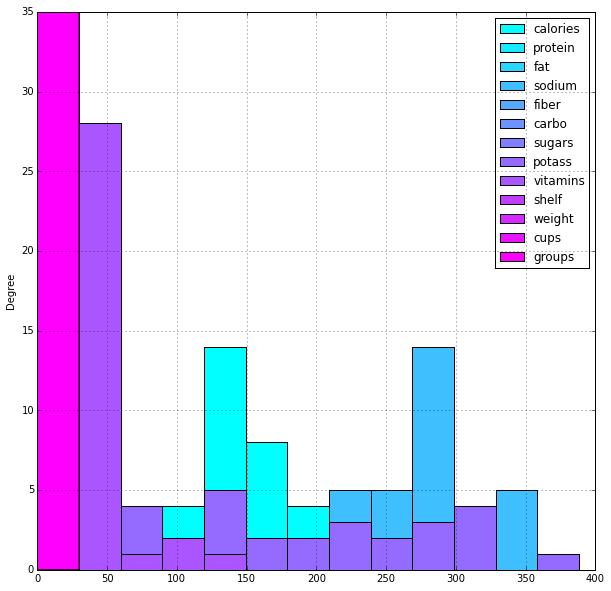

In [528]:
cereals_group_2.plot(kind='hist', bins=13, figsize=(10,10), cmap='cool')